# Homework 3

Maksim Nikiforov

## Part 1 - list and `numpy` practice

In [7]:
# Import the numpy library and the new way to do random number generation using numpy
# from # https://numpy.org/doc/stable/reference/random/index.html#random-quick-start
import numpy as np
from numpy.random import default_rng

# Use alias for default_rng()
rng = default_rng()

# Generate 10 values from a standard normal distribution and print those out
vals = rng.standard_normal(10)

print(vals)

[-0.57718968  0.67175759 -0.19237761  0.92379869 -0.24643007 -0.28128769
  0.24660631 -1.0310914   0.0225344  -0.46125738]


In [8]:
# Use numpy’s mean function to find the mean of the 10 values above
np.mean(vals)

-0.09249368422139218

In [9]:
# Use a list comprehension to generate 1000 data sets of size 10 from a standard normal.
# In your list comprehension, return the mean of the 10 randomly generated values.
normal_means = [np.mean(rng.standard_normal(10)) for x in range(0, 999)]

(array([  1.,   6.,  47., 135., 214., 274., 205.,  78.,  30.,   9.]),
 array([-1.15564795, -0.93819796, -0.72074797, -0.50329798, -0.28584799,
        -0.068398  ,  0.14905198,  0.36650197,  0.58395196,  0.80140195,
         1.01885194]),
 <BarContainer object of 10 artists>)

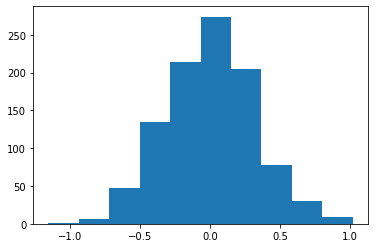

In [10]:
# Create a histogram of the means
import matplotlib.pyplot as plt
plt.hist(normal_means)

## Part 2 - dictionary practice

In this part, we’ll count the number of words in a book using a for loop and a dictionary.

In [11]:
# Read in charles-dickens-oliver-twist.txt as a string
with open('charles-dickens-oliver-twist.txt', 'r') as f: lines = f.read()
print(lines[:100])

﻿The Project Gutenberg EBook of Oliver Twist, by Charles Dickens

This eBook is for the use of anyon


In [12]:
# Remove the first part of the book (up to “CHAPTER I”) and the last portion of the book.

# Find index corresponding to "CHAPTER I"
startIndex = lines.find("CHAPTER I")
startIndex

6105

In [13]:
# Find index corresponding to the end of the book
endIndex = lines.find("End of the Project Gutenberg EBook")
endIndex

898242

In [14]:
# Store desired slice with starting and ending indexes that correspond
# to what we found above
desiredSlice = slice(startIndex, endIndex)

# Subset using our stored slice
desiredText = lines[desiredSlice]

# Print out the first 250 characters of the book 
print(desiredText[:250])

CHAPTER I

TREATS OF THE PLACE WHERE OLIVER TWIST WAS BORN AND OF THE
CIRCUMSTANCES ATTENDING HIS BIRTH

Among other public buildings in a certain town, which for many reasons
it will be prudent to refrain from mentioning, and to which I will
assign 


In [15]:
# Print out the last 250 characters of the book
print(desiredText[-250:])

d by the love--the love beyond the
grave--of those whom they knew in life, I believe that the shade of
Agnes sometimes hovers round that solemn nook. I believe it none the
less because that nook is in a Church, and she was weak and erring.













In [16]:
# Import the string module
import string

In [17]:
# Replace all the \n values with spaces 
repNewLine = desiredText.replace("\n", ' ')

# Convert each ‘word’ to lower case
lowerCaseText = repNewLine.lower()

In [18]:
# Split the text up via the spaces to get a list of ‘words’ you can iterate over
splitText = lowerCaseText.split(' ')

In [19]:
# Create an empty dictionary to store the words and the number of occurrences
wordCount = {}

# Write a for loop that iterates over the elements of the list and 
# counts the number of words
for word in splitText:
    if word != ' ':
        for punc in string.punctuation:
            # If punctuation exists in the ‘word’, use the .replace() method to replace it with an empty string
            if punc in word:
                word = word.replace(punc, "")
        # Check if the the word already exists in the dictionary
        if word not in wordCount:
            # If it does not, add that key to the dictionary with a value of 1
            wordCount[word] = 1
        else: 
            # If it does, add one to the associated value.
            wordCount[word] += 1
    else:
        # If you get a space, move to the next iteration
        continue

In [20]:
# Write a for loop to print out the first 20 key/value pairs in your dictionary

# Obtain the keys and turn them into a list
keys = list(wordCount.keys())

# Use the first 20 keys
for i in range(0, 20):
    print(keys[i], ' : ', wordCount[keys[i]])

chapter  :  61
i  :  1625
  :  7823
treats  :  4
of  :  3829
the  :  9558
place  :  115
where  :  189
oliver  :  746
twist  :  54
was  :  1783
born  :  21
and  :  5322
circumstances  :  22
attending  :  2
his  :  2343
birth  :  17
among  :  56
other  :  227
public  :  22


## Part 3 - reading data with `pandas` practice

In [21]:
# Initiate pandas library
import pandas as pd

# Read in the BreastCancer.dat data file, save the data as an object called cancer_data
# File is delimited with tabs, so use pd.read_csv() and include sep="\t" option
cancer_data = pd.read_csv("BreastCancer.dat", sep = "\t")

In [22]:
# Use the .head() method to look at the data
cancer_data.head()

,id,age,meno,size,grade,gradd1,gradd2,nodes,enodes,pgr,er,hormon,rectime,censrec,_st,_d,_t,_t0
0,132,49,premenopausal,18,2,1,0,2,0.786628,0,0,no tamoxifen,1838,0,1,0,5.032170,0
1,1575,55,Postmenopausal,20,3,1,1,16,0.146607,0,0,no tamoxifen,403,1,1,1,1.103354,0
2,1140,56,Postmenopausal,40,3,1,1,3,0.697676,0,0,no tamoxifen,1603,0,1,0,4.388775,0
3,769,45,premenopausal,25,3,1,1,1,0.886921,0,4,no tamoxifen,177,0,1,0,0.484600,0
4,130,65,Postmenopausal,30,2,1,0,5,0.548812,0,36,had tamoxifen,1855,0,1,0,5.078713,0


In [23]:
# Print out all rows where the size is larger than 30.
cancer_data[(cancer_data['size'] > 30)]

,id,age,meno,size,grade,gradd1,gradd2,nodes,enodes,pgr,er,hormon,rectime,censrec,_st,_d,_t,_t0
2,1140,56,Postmenopausal,40,3,1,1,3,0.697676,0,0,no tamoxifen,1603,0,1,0,4.388775,0
5,1642,48,premenopausal,52,2,1,0,11,0.267135,0,0,no tamoxifen,842,1,1,1,2.305270,0
14,820,32,premenopausal,57,3,1,1,24,0.056135,0,13,no tamoxifen,448,1,1,1,1.226557,0
19,1185,58,Postmenopausal,45,3,1,1,4,0.618783,0,0,no tamoxifen,370,1,1,1,1.013005,0
30,777,49,premenopausal,55,2,1,0,7,0.431710,0,0,no tamoxifen,679,1,1,1,1.859001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,157,59,Postmenopausal,45,2,1,0,6,0.486752,739,526,no tamoxifen,740,0,1,0,2.026010,0
673,1137,47,premenopausal,70,2,1,0,5,0.548812,796,24,no tamoxifen,1703,0,1,0,4.662560,0
674,1171,48,Postmenopausal,35,1,0,0,2,0.786628,845,105,had tamoxifen,1578,0,1,0,4.320328,0
675,1178,64,Postmenopausal,35,1,0,0,4,0.618783,858,15,no tamoxifen,722,0,1,0,1.976728,0


In [24]:
# Print out all rows where the size is greater than 30 and the grade is 3
cancer_data[(cancer_data['size'] > 30) & (cancer_data['grade'] == 3)]

,id,age,meno,size,grade,gradd1,gradd2,nodes,enodes,pgr,er,hormon,rectime,censrec,_st,_d,_t,_t0
2,1140,56,Postmenopausal,40,3,1,1,3,0.697676,0,0,no tamoxifen,1603,0,1,0,4.388775,0
14,820,32,premenopausal,57,3,1,1,24,0.056135,0,13,no tamoxifen,448,1,1,1,1.226557,0
19,1185,58,Postmenopausal,45,3,1,1,4,0.618783,0,0,no tamoxifen,370,1,1,1,1.013005,0
32,588,56,Postmenopausal,40,3,1,1,1,0.886921,0,3,no tamoxifen,1013,0,1,0,2.773443,0
37,735,48,premenopausal,45,3,1,1,1,0.886921,0,0,no tamoxifen,1862,0,1,0,5.097878,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,1239,37,premenopausal,35,3,1,1,1,0.886921,242,67,no tamoxifen,205,1,1,1,0.561259,0
637,884,53,premenopausal,75,3,1,1,19,0.102284,375,107,no tamoxifen,600,1,1,1,1.642710,0
652,1488,66,Postmenopausal,42,3,1,1,11,0.267135,412,339,had tamoxifen,394,1,1,1,1.078713,0
664,346,63,Postmenopausal,45,3,1,1,2,0.786628,530,328,no tamoxifen,2148,0,1,0,5.880903,0


In [25]:
# Read in the mosquito.txt file as an object called mosq_data
mosq_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/mosquito.txt", sep = "&")

In [26]:
# Use the .head() method to look at the data
mosq_data.head()

,Day,Cage,trt,Response
0,1,1,T2,42
1,2,1,T1,44
2,2,2,T2,42
3,3,1,T1,25
4,3,2,T3,33


In [27]:
# Read in the mosquito2.txt file. Note this file doesn’t contain column names! 
# The columns are the same as the other file though. 
# Use an attribute from mosq_data to assign the column names as you read in the data. 
# Save this data as an object called mosq_data2.

# This is a fixed width file, so we use the read_fwf method.
# We grab column names from mosq_data using the mosq_data.columns attribute
mosq_data2 = pd.read_fwf("https://www4.stat.ncsu.edu/~online/datasets/mosquito2.txt", 
                         sep = " ",
                         header = None,
                         names = mosq_data.columns)

In [28]:
mosq_data2.head()

,Day,Cage,trt,Response
0,16,1,"""T2""",40
1,16,2,"""T3""",37
2,17,1,"""T2""",34
3,17,2,"""T3""",39
4,18,1,"""T2""",42


In [29]:
# Combine the two datasets into one data frame using the concat() function from pandas.
mosq_data_combined = pd.concat([mosq_data, mosq_data2])

In [30]:
# Verify that the number of rows matches the combined total of mosq_data (37) and mosq_data2 (30)
mosq_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 29
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Day       67 non-null     int64 
 1   Cage      67 non-null     int64 
 2   trt       67 non-null     object
 3   Response  67 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.6+ KB
